In [ ]:
#Pkg.clone("https://github.com/pcmoritz/Strada.jl")
#Pkg.rm("Strada")
Pkg.build("Strada")

In [1]:
using Strada


Use "Dict{Symbol,Set{DataType}}(" instead.


In [48]:
function make_svm(p::Int; batchsize::Int=100)
    layers = [
        MemoryLayer("data"; shape=(batchsize, 1, 1, p)),
        MemoryLayer("label"; shape=(batchsize, 1)),
        LinearLayer("linear", ["data"]; weight_filler=weight_filler=filler(:gaussian; std=0.01)),
        SoftmaxWithLoss("loss", ["linear", "label"])
    ]
    return Net("SVMNet", layers; log_level=3)
end

make_svm (generic function with 1 method)

In [ ]:
net = Net("SimpleNet"; log_level=3)

function run_simple(net)
    reset(net)
    forward(net, DataLayer("data", data=ones(Float32, 10, 10)))
    forward(net, DataLayer("label", data=ones(Float32, 10)))
    forward(net, LinearLayer("ip1", ["data"]; n_filter=1, param_names=["ip1_weights", "ip1_bias"]))
    forward(net, ActivationLayer("relu1", ["ip1"]; activation=ReLU))
    forward(net, LinearLayer("ip2", ["relu1"]; n_filter=1, param_names=["ip2_weights", "ip2_bias"]))
    forward(net, SoftmaxWithLoss("loss", ["ip2", "label"]))
end

run_simple(net)

In [74]:
net = make_svm(1,batchsize=1)
(obj,theta) = make_objective(net,Float32)
predictor = make_predictor(net,Float32,"linear")

predictor (generic function with 1 method)

In [75]:
data = minibatch_stream(x',0.5*x',batchsize=1);
testset = minibatch_stream(x,ground_truth(x))
# sgd(obj, data, theta; predictor=predictor, testset=testset,
#    lr_schedule=InvLR(0.01, 0.0001, 0.75, 0.9), epochs=5, verbose=true)

Strada.MinibatchStream(NTuple{N,AbstractArray{F,N}}[(Float32[0.65f0],Float32[3.0f0]),(Float32[-0.31f0],Float32[1.0f0]),(Float32[-0.13f0],Float32[1.0f0]),(Float32[0.39f0],Float32[3.0f0]),(Float32[-0.81f0],Float32[1.0f0]),(Float32[-0.86f0],Float32[1.0f0]),(Float32[0.08f0],Float32[3.0f0]),(Float32[0.41f0],Float32[3.0f0]),(Float32[-0.01f0],Float32[1.0f0]),(Float32[0.75f0],Float32[3.0f0])  …  (Float32[1.0f0],Float32[3.0f0]),(Float32[-0.83f0],Float32[1.0f0]),(Float32[-0.5f0],Float32[1.0f0]),(Float32[-0.9f0],Float32[1.0f0]),(Float32[-0.77f0],Float32[1.0f0]),(Float32[-0.48f0],Float32[1.0f0]),(Float32[0.1f0],Float32[3.0f0]),(Float32[-0.51f0],Float32[1.0f0]),(Float32[-0.03f0],Float32[1.0f0]),(Float32[0.59f0],Float32[3.0f0])],1)

In [76]:
sgd(obj, data, theta; predictor=predictor, testset=testset,verbose=true,epochs=100)

2-element Array{Float32,1}:
 0.00323351
 0.0       

In [77]:
for batch in data
    @show batch
    @show predictor(batch,theta)
end

batch = (
Float32[0.65],

Float32[0.325])
predictor(batch,theta) = 0.0f0
batch = (
Float32[-0.31],

Float32[-0.155])
predictor(batch,theta) = 0.0f0
batch = (
Float32[-0.13],

Float32[-0.065])
predictor(batch,theta) = 0.0f0
batch = (
Float32[0.39],

Float32[0.195])
predictor(batch,theta) = 0.0f0
batch = (
Float32[-0.81],

Float32[-0.405])
predictor(batch,theta) = 0.0f0
batch = (
Float32[-0.86],

Float32[-0.43])
predictor(batch,theta) = 0.0f0
batch = (
Float32[0.08],

Float32[0.04])
predictor(batch,theta) = 0.0f0
batch = (
Float32[0.41],

Float32[0.205])
predictor(batch,theta) = 0.0f0
batch = (
Float32[-0.01],

Float32[-0.005])
predictor(batch,theta) = 0.0f0
batch = (
Float32[0.75],

Float32[0.375])
predictor(batch,theta) = 0.0f0
batch = (
Float32[-0.56],

Float32[-0.28])
predictor(batch,theta) = 0.0f0
batch = (
Float32[-0.15],

Float32[-0.075])
predictor(batch,theta) = 0.0f0
batch = (
Float32[0.56],

Float32[0.28])
predictor(batch,theta) = 0.0f0
batch = (
Float32[0.79],

Float32[0.395])

In [86]:
reset(net)
forward(net)
net.blobs

LoadError: LoadError: MethodError: `reset` has no method matching reset(::Strada.CaffeNet)
while loading In[86], in expression starting on line 1

In [7]:


function simulate_data(x::Array)
    noise_ampl = 0.1;
    return map(Float32,ground_truth(x + randn(size(x))))
end


x = Array(shuffle(collect(Float32,-1:0.01:1)));
y = Array(Float32,size(x))
y[:] =simulate_data(x);
#plot(x,y)

201-element Array{Float32,1}:
 3.0
 3.0
 1.0
 3.0
 1.0
 3.0
 3.0
 3.0
 3.0
 3.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 3.0
 3.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 3.0
 3.0

In [6]:
function ground_truth(x)
    return sign(x) .+ 2;
end



ground_truth([1,2,3,-1])

4-element Array{Int64,1}:
 3
 3
 3
 1

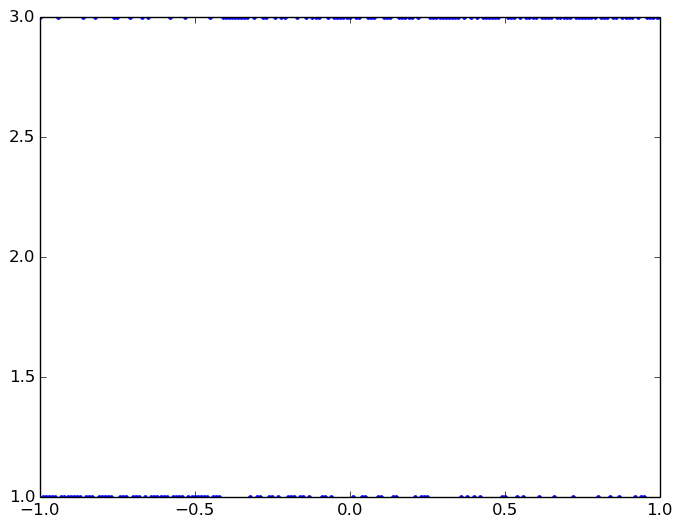

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x6c46250>

In [21]:
using PyPlot
plot(x,y,".")

(-1.5:0.5:1.0,[1,50,50,50,50])